In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

import networkx as nx
import itertools
import time
import os
import sys
import csv
nb_dir = os.getcwd()
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [209]:
########################################################################################
# Plot options
########################################################################################

colors=['cornflowerblue', 'mediumseagreen', 'indianred', 'bisque', 'orchid', 'turquoise', 'grey', 'gold', 'lawngreen', 'slateblue']
dark_colors = ['navy', 'darkgreen', 'maroon', 'darkorange', 'darkmagenta', 'darkcyan', 'black', 'peru', 'limegreen', 'indigo']

rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

fs=20
ls=20
lgs=16
ts=24
mew = 2
ms = 10
lw=2

### Plots base topology

In [258]:
########################################################################################
# Variable Parameters
########################################################################################

# problem size = number of nodes in the graph = number of qubits
problem_sizes = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100]) #np.linspace(10, 100, 10).astype(int)

# graph density = number of edges / maximum number of edges (=all-to-all)
graph_densities = np.array([0.3, 0.5, 0.7, 0.9]) #np.linspace(0.5, 0.9, 5)

# number of qaoa layers
qaoa_layers = np.array([1])#np.linspace(1, 10, 10)

In [259]:
filename_base = 'prob_sizes_'+str(problem_sizes[0])+'_'+str(problem_sizes[-1])+'_prob_densities_'+str(graph_densities[0])+'_'+str(graph_densities[-1])+'_qaoa_layers_'+str(qaoa_layers[0])+'_'+str(qaoa_layers[-1])+'.csv'
data_raw=np.asarray(list(csv.reader(open('Custom_topologies_maxcut//base_topology//'+filename_base))))[1:,:].astype(float) #skip first line containing headers
data = data_raw.reshape((len(qaoa_layers), len(graph_densities), len(problem_sizes), -1)) #last dimension is variable, since some fiels are missing the times_std column.

Scan problem size and graph density for fixed qaoa-layers

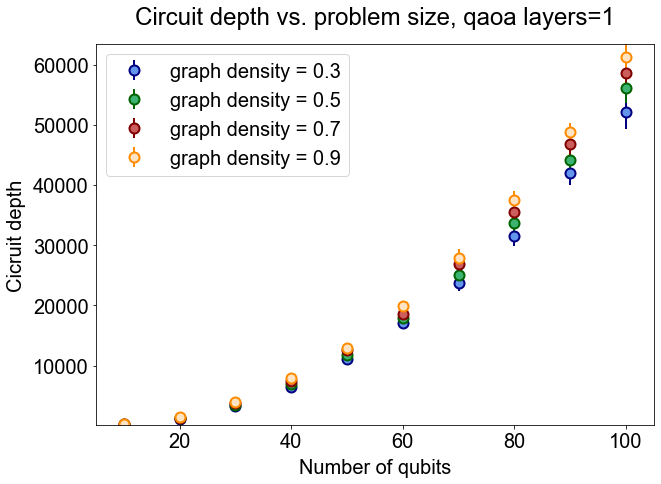

In [263]:
for i in range(len(qaoa_layers)):
    p=qaoa_layers[i]

    fig_filename = 'circ_depth_vs_prob_size_qaoa_layers_'+str(p)

    fig, ax1 = plt.subplots(figsize=(10,7))
    plt.title('Circuit depth vs. problem size, qaoa layers='+str(p), fontsize=ts, pad=20)

    ax1.margins(x=0, y=0)

    for d in range(len(graph_densities)):

        ax1.errorbar(problem_sizes, data[i,d,:,3], yerr=data[i,d,:,4], label='graph density = '+str(graph_densities[d]), fmt='o', markersize=ms, markeredgewidth=mew, markeredgecolor=dark_colors[d], markerfacecolor=colors[d], elinewidth=lw, ecolor=dark_colors[d], color=dark_colors[d])
    ax1.set_ylabel('Cicruit depth', fontsize=fs, color='black', labelpad=7)
    #ax1.set_ylim(-1000, 61000)

    ax1.set_xlabel('Number of qubits', fontsize=fs, labelpad=7)
    ax1.set_xlim(5, 105)
    ax1.tick_params(axis='both', which='major', labelsize=ls)
    ax1.legend(fontsize=fs)
    #ax2.tick_params(axis='both', which='major', labelsize=ls)

    plt.savefig('Custom_topologies_maxcut//base_topology//'+fig_filename+'.png', bbox_inches='tight', facecolor='white', transparent=False)
    plt.savefig('Custom_topologies_maxcut//base_topology//'+fig_filename+'.pdf', bbox_inches='tight')

### Plots extended topology

In [241]:
########################################################################################
# Variable Parameters
########################################################################################

# problem size = number of nodes in the graph = number of qubits
problem_sizes = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100]) #np.linspace(10, 100, 10).astype(int)

# graph density = number of edges / maximum number of edges (=all-to-all)
graph_densities = np.array([0.7]) #np.linspace(0.5, 0.9, 5)

# number of qaoa layers
qaoa_layers = np.array([1])#np.linspace(1, 10, 10)

# coupling densities
cmap_densities = np.array([0.0139, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])#np.linspace(0.1, 1.0, 10)

In [242]:
filename_ext = 'prob_sizes_'+str(problem_sizes[0])+'_'+str(problem_sizes[-1])+'_prob_densities_'+str(graph_densities[0])+'_'+str(graph_densities[-1])+'_qaoa_layers_'+str(qaoa_layers[0])+'_'+str(qaoa_layers[-1])+'_cmap_densitites_'+str(cmap_densities[0])+'_'+str(cmap_densities[-1])+'.csv'
data_raw_ext=np.asarray(list(csv.reader(open('Custom_topologies_maxcut//ext_topology//'+filename_ext))))[1:,:].astype(float) #skip first line containing headers
data_ext = data_raw_ext.reshape((len(cmap_densities), len(qaoa_layers), len(graph_densities), len(problem_sizes), -1)) #last dimension is variable, since some fiels are missing the times_std column.

Scan problem size and connectivity for fixed qaoa-layers and graph density

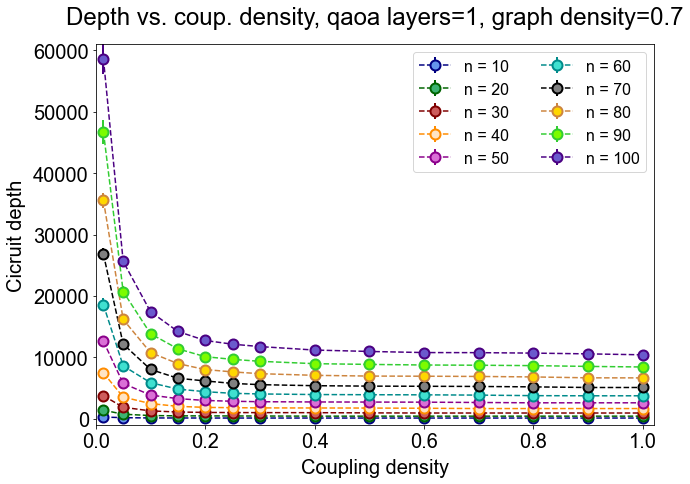

In [245]:
for i in range(len(qaoa_layers)):
    p = qaoa_layers[i]
    for d in range(len(graph_densities)):
        density = graph_densities[d]

        fig_filename = 'circ_depth_vs_coupling_density_qaoa_layers_'+str(p)+'_graph_density_'+str(density)+'_cmap_densitites_'+str(cmap_densities[0])+'_'+str(cmap_densities[-1])

        fig, ax1 = plt.subplots(figsize=(10,7))
        plt.title('Depth vs. coup. density, qaoa layers='+str(p)+', graph density='+str(density), fontsize=ts, pad=20)

        #ax2 = ax1.twinx()
        ax1.margins(x=0, y=0)
        #ax2.margins(x=0, y=0)

        for n in range(len(problem_sizes)):
            prob_size=problem_sizes[n]

            ax1.errorbar(cmap_densities, data_ext[:,i,d,n,4], yerr=data_ext[:,i,d,n,5], label='n = '+str(problem_sizes[n]), fmt='o--', markersize=ms, markeredgewidth=mew, markeredgecolor=dark_colors[n], markerfacecolor=colors[n], elinewidth=lw, ecolor=dark_colors[n], color=dark_colors[n])
        ax1.set_ylabel('Cicruit depth', fontsize=fs, color='black', labelpad=7)
        ax1.set_ylim(-1000, 61000)

        ax1.set_xlabel('Coupling density', fontsize=fs, labelpad=7)
        ax1.set_xlim(0, 1.02)
        ax1.tick_params(axis='both', which='major', labelsize=ls)
        #ax2.tick_params(axis='both', which='major', labelsize=ls)
        ax1.legend(fontsize=lgs, ncol=2)

        #plt.show()

        plt.savefig('Custom_topologies_maxcut//ext_topology//'+fig_filename+'.png', bbox_inches='tight', facecolor='white', transparent=False)
        plt.savefig('Custom_topologies_maxcut//ext_topology//'+fig_filename+'.pdf', bbox_inches='tight')